# Development and Validation of an Adaptive Machine Learning Pipeline for Cardiovascular Disease Risk Prediction

### Background:
The primary cause of morbidity and mortality worldwide is cardiovascular disease (CVD). Brunei Darussalam is no exception; CVDs were the leading cause of death in 2015. Therefore, CVDs have substantial effects on public health and will eventually impair Brunei's economically productive workforce. In Brunei, the sole recommended technique for assessing CVD risk is the WHO/ISH risk prediction chart, which has not been validated in the local population. During the COVID-19 pandemic, MOH Brunei Darussalam developed the BruHealth mobile application on a digital platform with several essential features that have a significant impact on the general public's health. 

### Methods: 
A Supervised Classification Machine Learning Problem using standard libraries and modules in the Python3 environment and the TensorFlow backend since **an Adaptive AI predictive modelling pipeline of machine learning algorithms** will be developed and validated using open source CVD risk data collated from the literature and then will be tested by local Bruneian CVD risk data and then will be continuously updated and adapted with the prospectively populated CVD risk data through BruHealth national mobile application.

### Objectives
1. To develop an Adaptive pipeline of different ML and DL algorithms for predicting the risk of the future CVD events and tested by Brunei-specific CVD risk data.
2. To estimate the accuracy, sensitivity (recall), specificity, positive predictive value (precision), area under the ROC curve (AUC ROC), the area under the precision-recall curve (AUC PR) and F1 score of the developed ML/DL algorithms pipeline.
3. To compare and prioritize the performance of the different ML/DL classifiers used in developing this automated CVD risk calculator using calculated metrics using an internal validation by splitting the data into training and validation dataset and an external testing by local Bruneian CVD risk data.

## Importing Libraries

In [2]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np

# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Reading the Brunei_validation dataset

In [3]:
# Reading office_based dataset
Brunei_df = pd.read_csv(
    "~/Desktop/CVD risk prediction Notebook/Datasets/Brunei_validation_dataset.csv")

# Informtion about the raw dataset
Brunei_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1000 non-null   int64  
 1   Age              1000 non-null   float64
 2   Gender           1000 non-null   int64  
 3   SysBP            1000 non-null   float64
 4   Diabetes         1000 non-null   int64  
 5   Smoking          1000 non-null   int64  
 6   Tot_Chol_mmol/l  1000 non-null   float64
 7   CVD risk         1000 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 62.6 KB


In [4]:
# define variable columns based on office-based CVD screening strategy
Brunei_df = Brunei_df.loc[:,['Age','Gender','SysBP','Diabetes','Smoking','Tot_Chol_mmol/l','CVD risk']]
Brunei_df.head()

,Age,Gender,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l,CVD risk
0,56.0,1,110.1,0,0,6.1,0
1,67.7,1,183.7,0,0,7.5,0
2,62.6,2,129.0,0,0,4.3,0
3,61.8,2,160.1,0,0,7.1,0
4,46.8,1,104.2,0,1,4.6,0


## Exploratory Data Analysis

### 1. Univariate Analysis

#### Categorical Features

In [5]:
# Defining the categorical variables
categorical_features = ['Gender', 'Diabetes', 'Smoking', 'CVD risk']

In [6]:
for feature in categorical_features:
    print(feature,':')
    print(Brunei_df[feature].value_counts())
    print("-----------------")

Gender :
1    682
2    318
Name: Gender, dtype: int64
-----------------
Diabetes :
0    973
1     27
Name: Diabetes, dtype: int64
-----------------
Smoking :
0    749
1    251
Name: Smoking, dtype: int64
-----------------
CVD risk :
0    977
1     23
Name: CVD risk, dtype: int64
-----------------


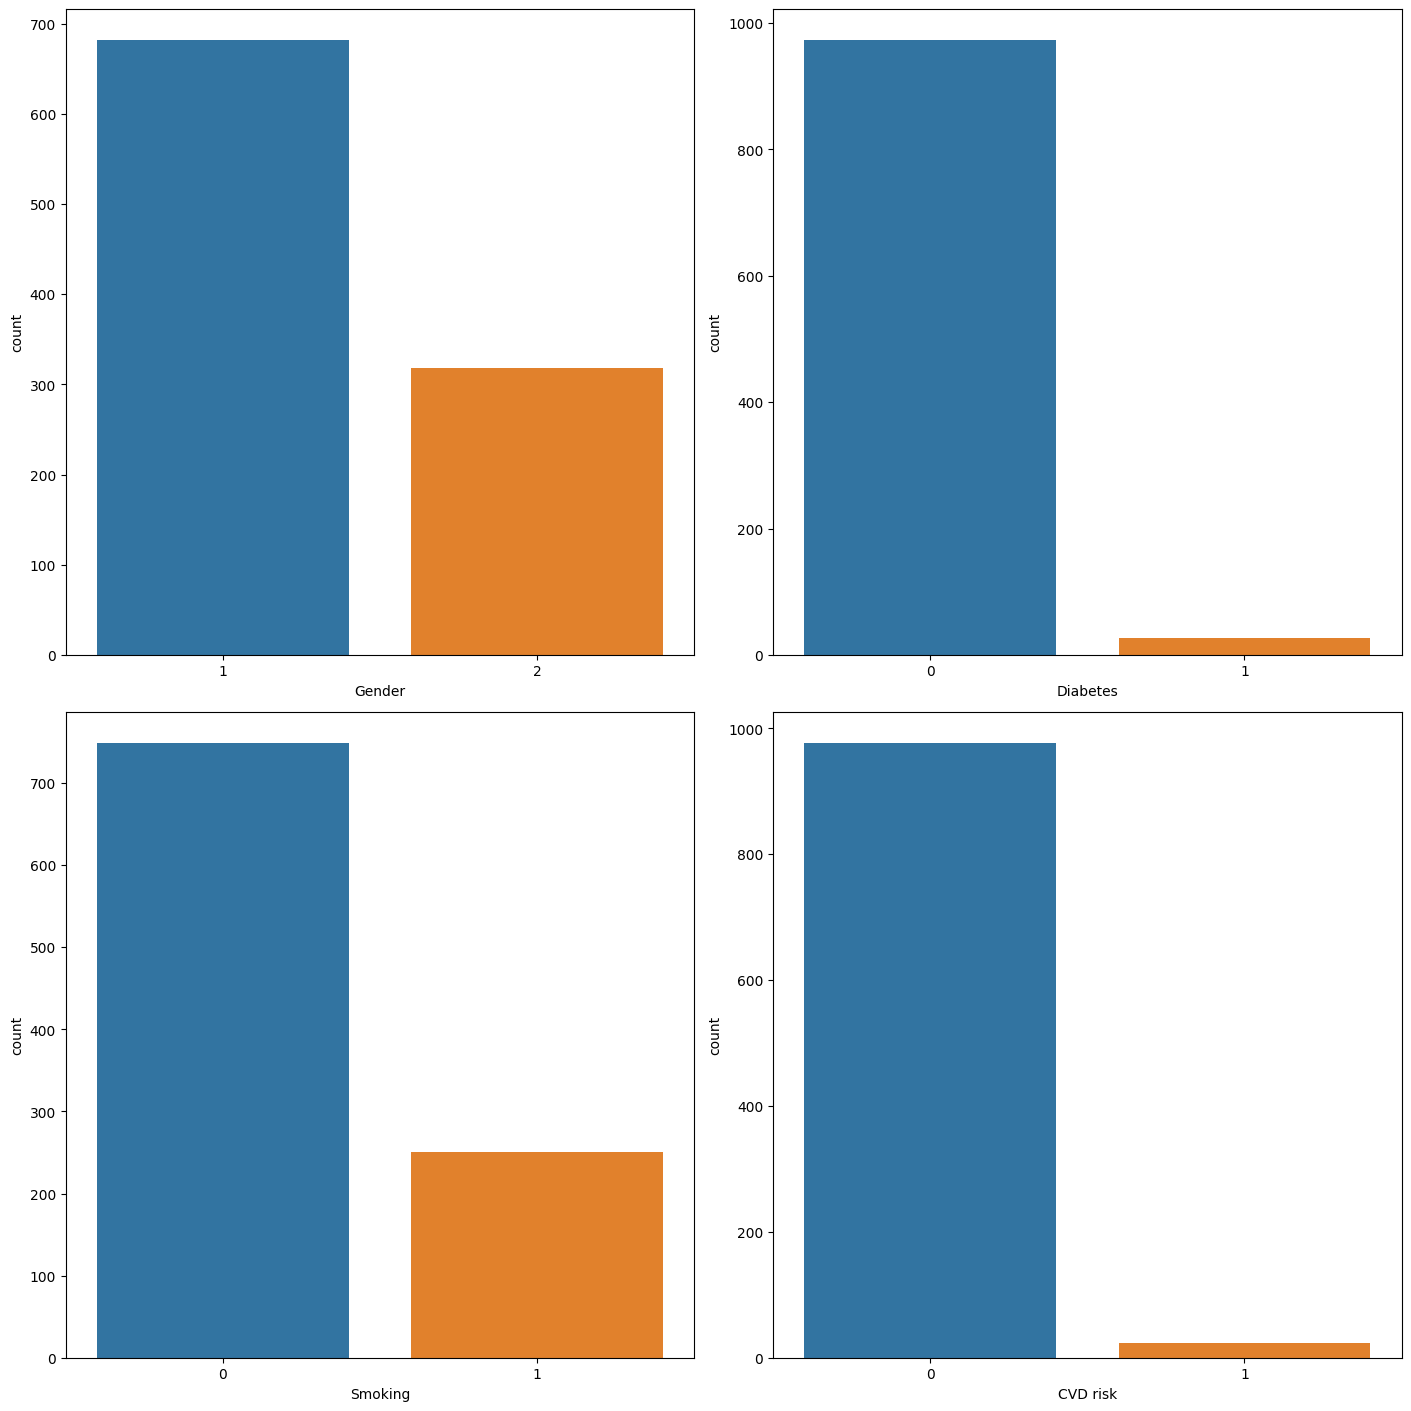

In [7]:
# Plotting the categorical variables in  the dataset

num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots //total_cols 
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=Brunei_df, ax=axs[row][pos])

Among the categorical features:
* `Gender` and `Smoking` are slighlty imbalanced.
* `Diabetes` is highly imbalanced.
* The target labl `CVD risk` is also showing high class imbalance.

#### Numerical Features

In [8]:
numeric_features = ['Age', 'SysBP', 'Tot_Chol_mmol/l']

In [9]:
# Checking the brief statistical properities of the numerical variables in the dataset

Brunei_df[numeric_features].describe()

,Age,SysBP,Tot_Chol_mmol/l
count,1000.000000,1000.000000,1000.000000
mean,53.806500,127.560700,5.457900
std,12.635464,20.541623,1.459791
min,17.600000,72.800000,1.300000
25%,47.300000,113.075000,4.500000
50%,55.750000,125.800000,5.400000
75%,62.500000,138.325000,6.400000
max,84.400000,224.600000,12.900000


#### Observations

- Age has normal range between `17.6` to `84.4` years, with mean of `53.8` years, median of `55.75` years and IQR between `47.3` and `62.5` years. 
- Systolic blood pressure "SysBP" has normal range between `72.8` to `224.6` mmHg, with mean of `127.5` mmHg, median of `125.8` mmHg and IQR between `113` and `138.3` mmHg. 
- Total cholesterol "Tot_Chol_mmol/l" has normal range between `1.3` to `12.9` mmol/l, with mean of `5.46` mmol/l, median of `5.4` mmol/l and IQR between `4.5` and `6.4` mmol/l. 

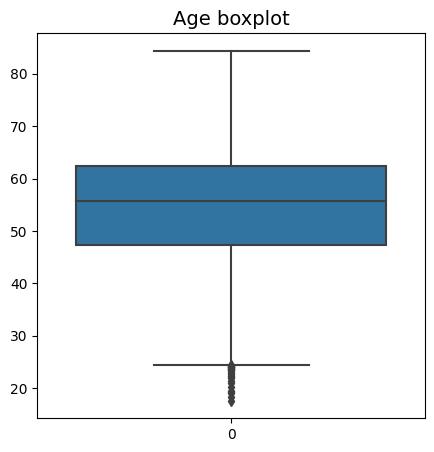

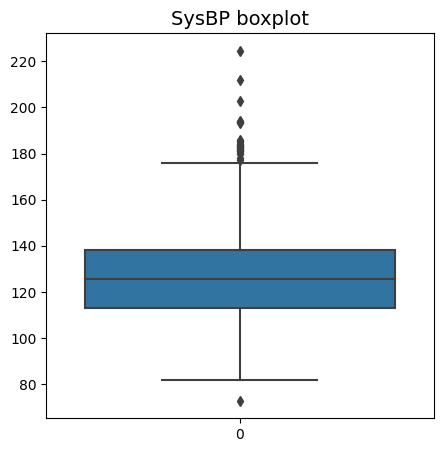

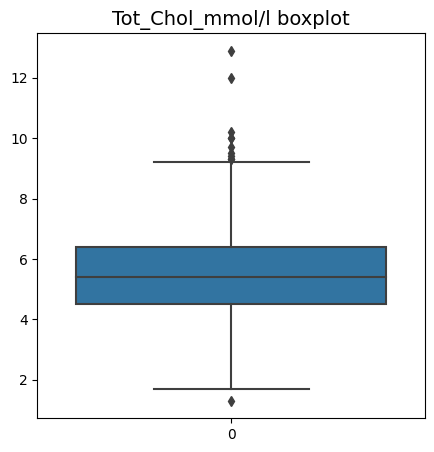

In [10]:
# Plotting the numerical variables in  the dataset
for feature in numeric_features:
    plt.figure(figsize=(5,5), facecolor='w')
    sns.boxplot(data=Brunei_df[feature])
    plt.title(f'{feature} boxplot', fontsize=14)
    plt.show()

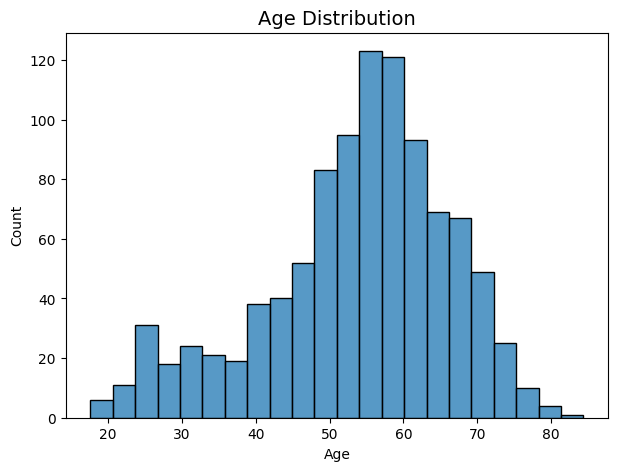

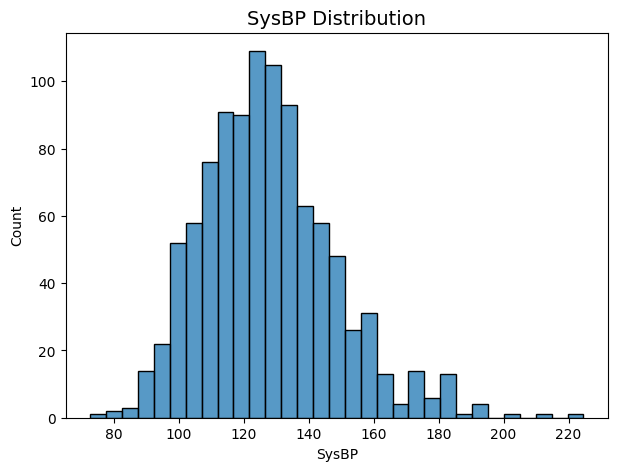

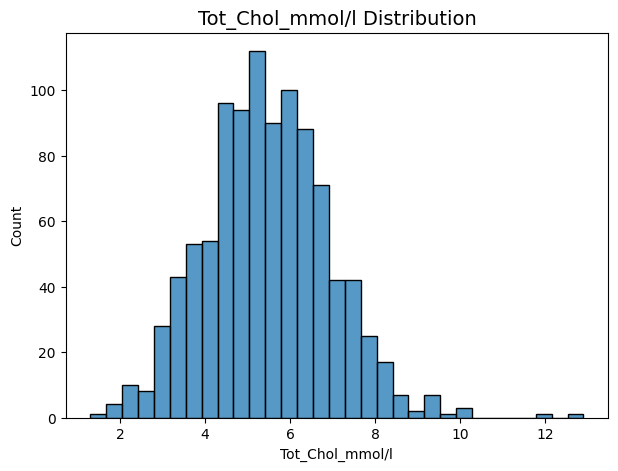

In [11]:
# plotting the distribution of numerical variables
for feature in numeric_features:
    plt.figure(figsize=(7, 5))
    sns.histplot(Brunei_df[feature])
    plt.title(f'{feature} Distribution', fontsize=14)
    plt.show()

#### Observations

- `Age`, `Systolic blood pressure "SysBP"` distribution and `total cholesterol` distribution are almost normal with slight  skewness and some outliers.

#### Label variable

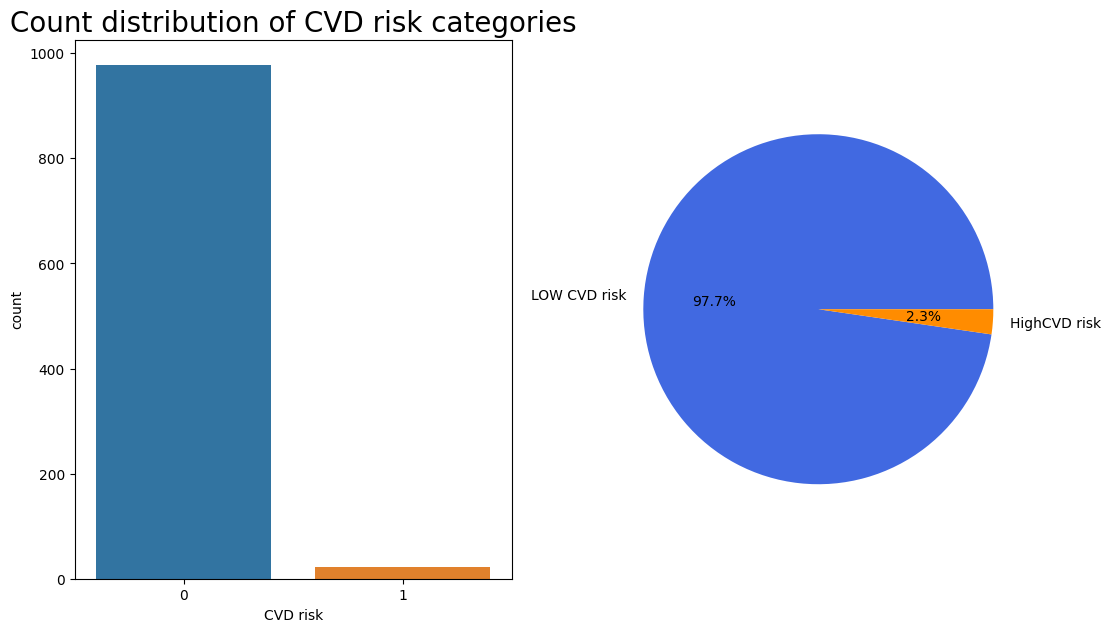

In [27]:
#Distribution of label variable,'CVD risk'

plt.figure(figsize=(7, 7), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="CVD risk", data=Brunei_df)
plt.title("Count distribution of CVD risk categories", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(Brunei_df["CVD risk"].value_counts(),autopct="%1.1f%%",labels=['LOW CVD risk', 'HighCVD risk'],
        colors=["royalblue", "darkorange"])
plt.show()

#### Observations

- `CVD risk` the label variable shows **`high class imbalance`**.

### 2. Bivariate Analysis

#### Relation between Gender and risk of CVD

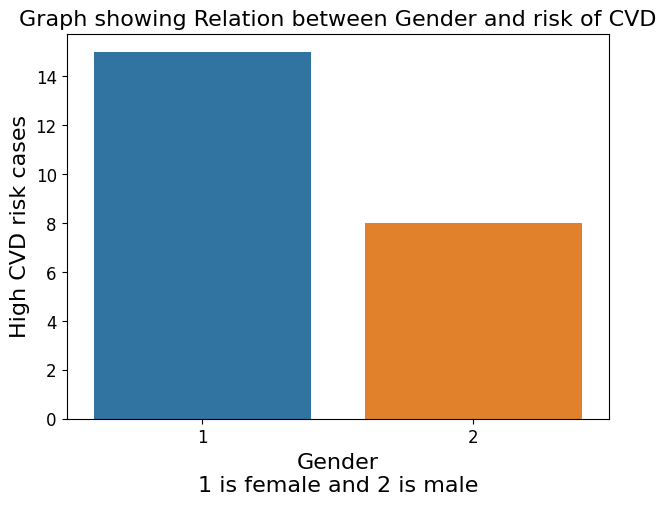

In [16]:
#checking for which gender has more risk of CVD
graph_1 = Brunei_df.groupby("Gender", as_index=False)
graph_1 = graph_1['CVD risk'].sum()

#Ploting the above values
plt.figure(figsize=(7,5), facecolor='w')
sns.barplot(x=graph_1["Gender"], y=graph_1["CVD risk"])
plt.title("Graph showing Relation between Gender and risk of CVD", size=16)
plt.xlabel("Gender\n1 is female and 2 is male",size=16)
plt.ylabel("High CVD risk cases", size=16)
plt.xticks(size=12);
plt.yticks(size=12);

According to this graph, `Females` have shown a higher risk of cardiovascular disease `CVD risk`.

#### Relation between Smoking and risk of CVD

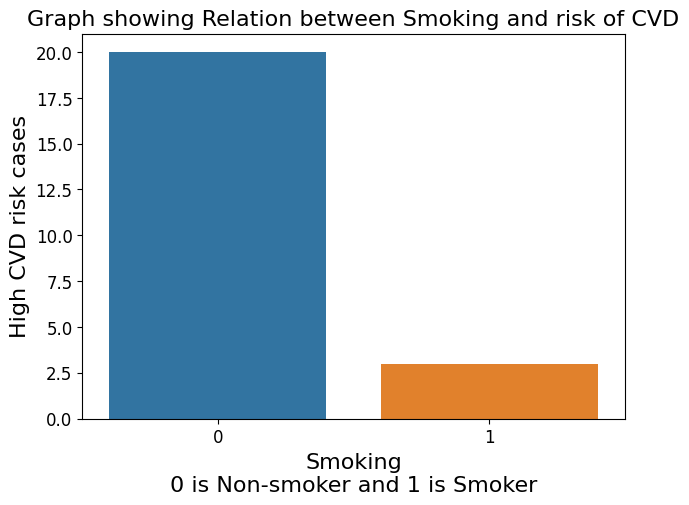

In [17]:
#checking for which gender has more risk of CVD
graph_2 = Brunei_df.groupby("Smoking", as_index=False)
graph_2 = graph_2['CVD risk'].sum()

#Ploting the above values
plt.figure(figsize=(7,5), facecolor='w')
sns.barplot(x=graph_2["Smoking"], y=graph_2["CVD risk"])
plt.title("Graph showing Relation between Smoking and risk of CVD", size=16)
plt.xlabel("Smoking\n0 is Non-smoker and 1 is Smoker",size=16)
plt.ylabel("High CVD risk cases", size=16)
plt.xticks(size=12);
plt.yticks(size=12);

According to this graph, Unlikely `non-smokers` have shown a higher risk of cardiovascular disease `CVD risk`.

#### Relation between Diabetes and risk of CVD

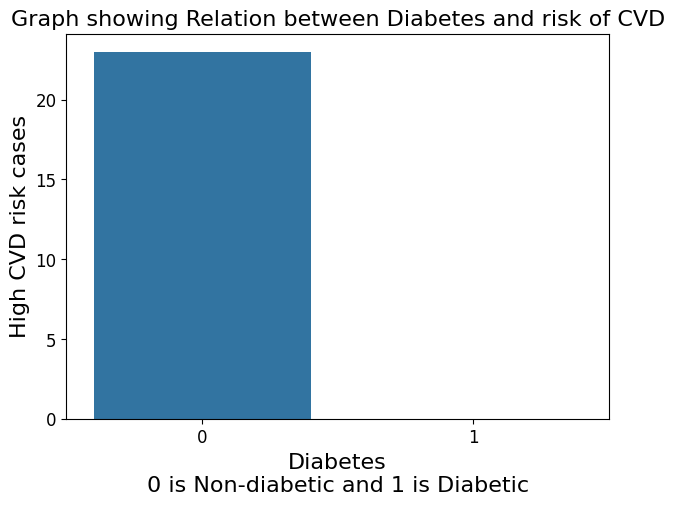

In [18]:
#checking for which Diabetes has more risk of CVD
graph_3 = Brunei_df.groupby("Diabetes", as_index=False)
graph_3 = graph_3['CVD risk'].sum()

#Ploting the above values
plt.figure(figsize=(7,5), facecolor='w')
sns.barplot(x=graph_3["Diabetes"], y=graph_3["CVD risk"])
plt.title("Graph showing Relation between Diabetes and risk of CVD", size=16)
plt.xlabel("Diabetes\n0 is Non-diabetic and 1 is Diabetic",size=16)
plt.ylabel("High CVD risk cases", size=16)
plt.xticks(size=12);
plt.yticks(size=12);

According to this graph, Unlikely only `Non-diabetic` have shown high risk of cardiovascular disease `CVD risk`.

#### Relation between Systolic blood pressure and risk of CVD

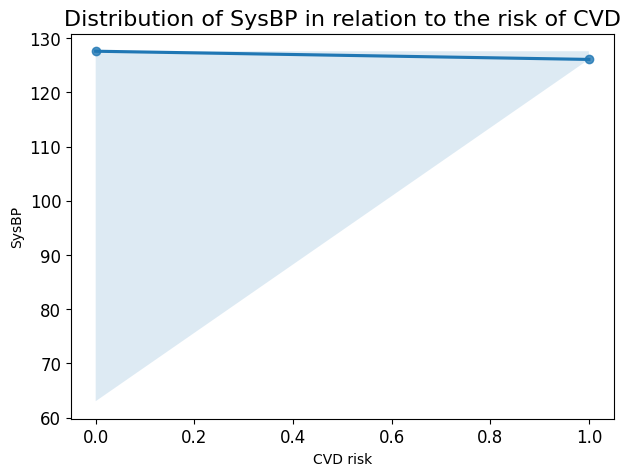

In [19]:
# Grouping and plotting of the data

graph_4 = Brunei_df.groupby("CVD risk", as_index=False).SysBP.mean()

plt.figure(figsize=(7,5), facecolor='w')
sns.regplot(x=graph_4["CVD risk"], y=graph_4["SysBP"])
plt.title("Distribution of SysBP in relation to the risk of CVD", size=16)
plt.xticks(size=12);
plt.yticks(size=12);

* The graph shows a minor relation of `CVD risk` with `SysBP`

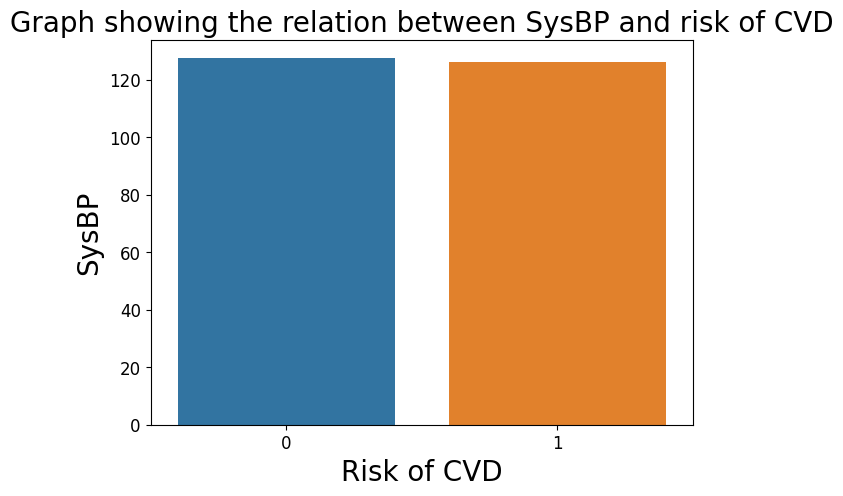

In [20]:
plt.figure(figsize=(7,5), facecolor='w')
sns.barplot(x=graph_4["CVD risk"], y=graph_4["SysBP"])
plt.title("Graph showing the relation between SysBP and risk of CVD", size=20)
plt.xlabel("Risk of CVD", size=20)
plt.ylabel("SysBP", size=20)
plt.xticks(size=12);
plt.yticks(size=12);

* The graph shows that high and low `CVD risk` group have mean systolic blood pressure of about `125` mmHg.

#### Relation between Total cholesterol and risk of CVD

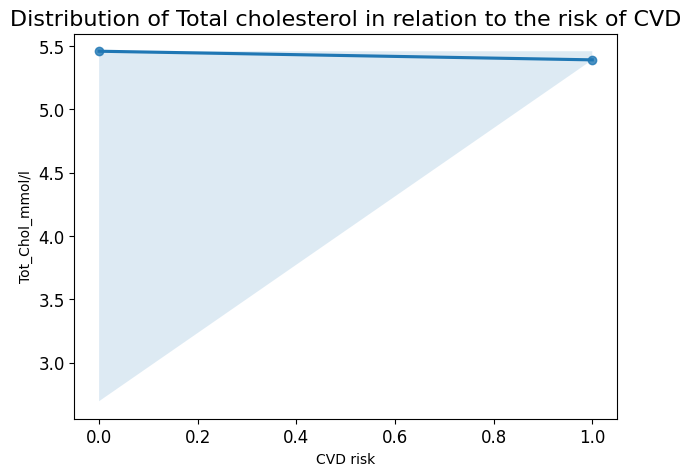

In [21]:
# Grouping and plotting of the data

graph_5 = Brunei_df.groupby("CVD risk", as_index=False)
graph_5 = graph_5['Tot_Chol_mmol/l'].mean()
plt.figure(figsize=(7,5), facecolor='w')
sns.regplot(x=graph_5["CVD risk"], y=graph_5["Tot_Chol_mmol/l"])
plt.title("Distribution of Total cholesterol in relation to the risk of CVD", size=16)
plt.xticks(size=12);
plt.yticks(size=12);

* The graph shows a minor relation of `CVD risk` with `total cholesterol`

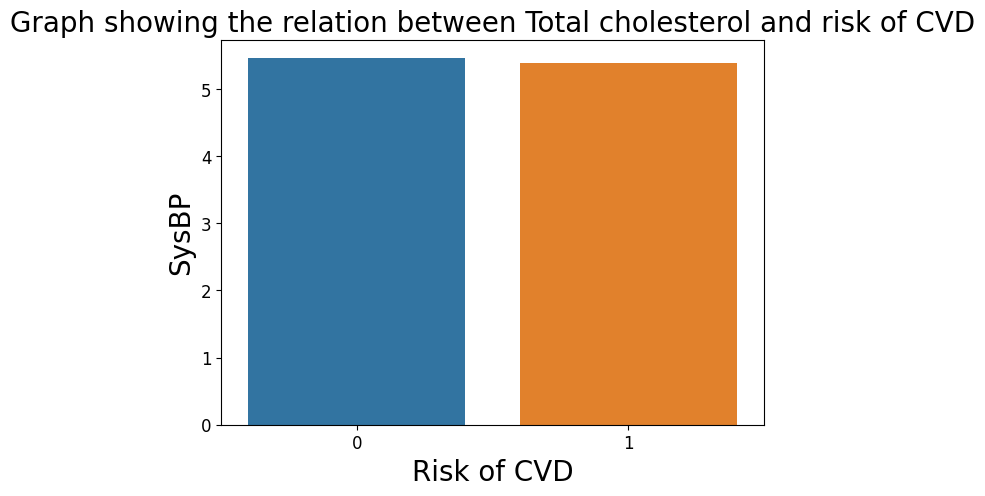

In [22]:
plt.figure(figsize=(7,5), facecolor='w')
sns.barplot(x=graph_5["CVD risk"], y=graph_5["Tot_Chol_mmol/l"])
plt.title("Graph showing the relation between Total cholesterol and risk of CVD", size=20)
plt.xlabel("Risk of CVD", size=20)
plt.ylabel("SysBP", size=20)
plt.xticks(size=12);
plt.yticks(size=12);

* The graph shows that high and low `CVD risk` group have mean total cholesterol of about `5.5` mmol/L.

#### Relation between Age and risk of CVD

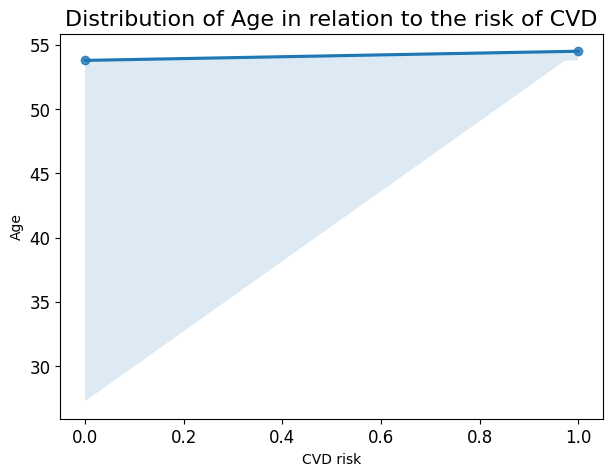

In [23]:
graph_6 = Brunei_df.groupby("CVD risk", as_index=False).Age.mean()

plt.figure(figsize=(7,5), facecolor='w')
sns.regplot(x=graph_6["CVD risk"], y=graph_6["Age"])
plt.title("Distribution of Age in relation to the risk of CVD", size=16)
plt.xticks(size=12);
plt.yticks(size=12);

* The graph shows a minor relation of `CVD risk` with `Age`

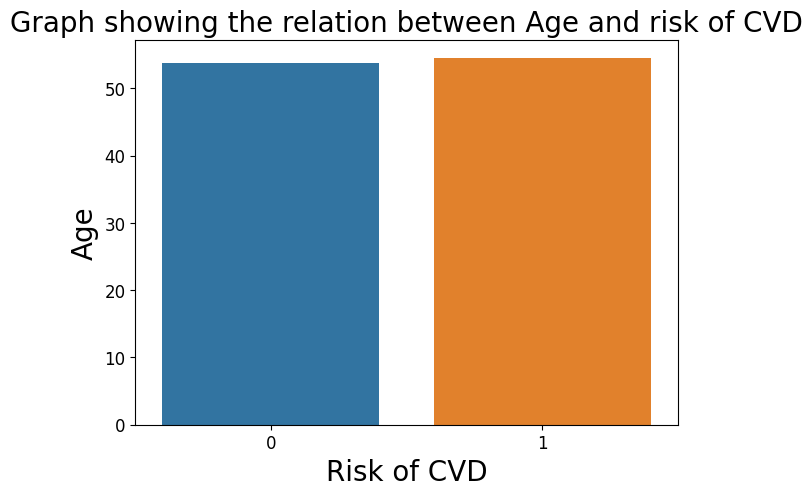

In [24]:
plt.figure(figsize=(7,5), facecolor='w')
sns.barplot(x=graph_6["CVD risk"], y=graph_6["Age"])
plt.title("Graph showing the relation between Age and risk of CVD", size=20)
plt.xlabel("Risk of CVD", size=20)
plt.ylabel("Age", size=20)
plt.xticks(size=12);
plt.yticks(size=12);

* The graph shows that high and low `CVD risk` group have mean Age of about `55` years.

#### Relation of Systolic Blood pressure with every age group

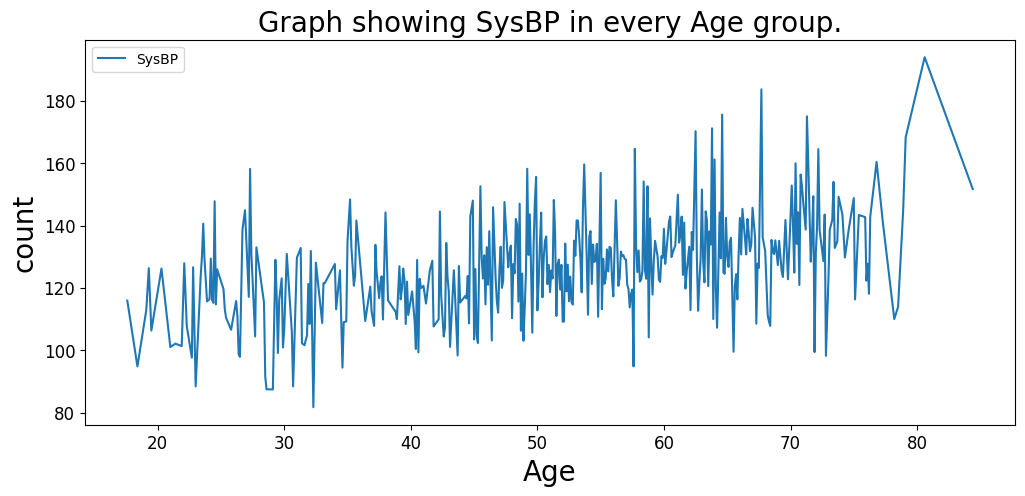

In [25]:
graph_7 = Brunei_df.groupby("Age").SysBP.mean()
plt.figure(figsize=(12,5), facecolor='w')
sns.lineplot(data=graph_7, label="SysBP")
plt.title("Graph showing SysBP in every Age group.", size=20)
plt.xlabel("Age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12);
plt.yticks(size=12);

* The graph shows that the Systolic Blood pressure tends to slightly increase with age with alot of fluctuation.

#### Relation of Total cholesterol with every age group

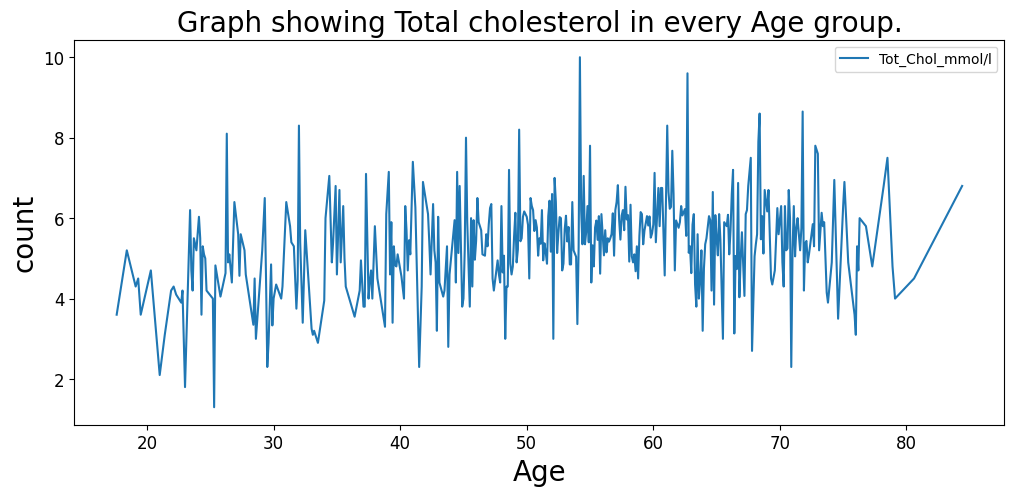

In [26]:
graph_8 = Brunei_df.groupby("Age")
graph_8 = graph_8['Tot_Chol_mmol/l'].mean()
plt.figure(figsize=(12,5), facecolor='w')
sns.lineplot(data=graph_8, label="Tot_Chol_mmol/l")
plt.title("Graph showing Total cholesterol in every Age group.", size=20)
plt.xlabel("Age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12);
plt.yticks(size=12);

* The graph shows that the totol cholesterol tends to slightly increase with age with alot of fluctuation.

### Correlation Heat Map

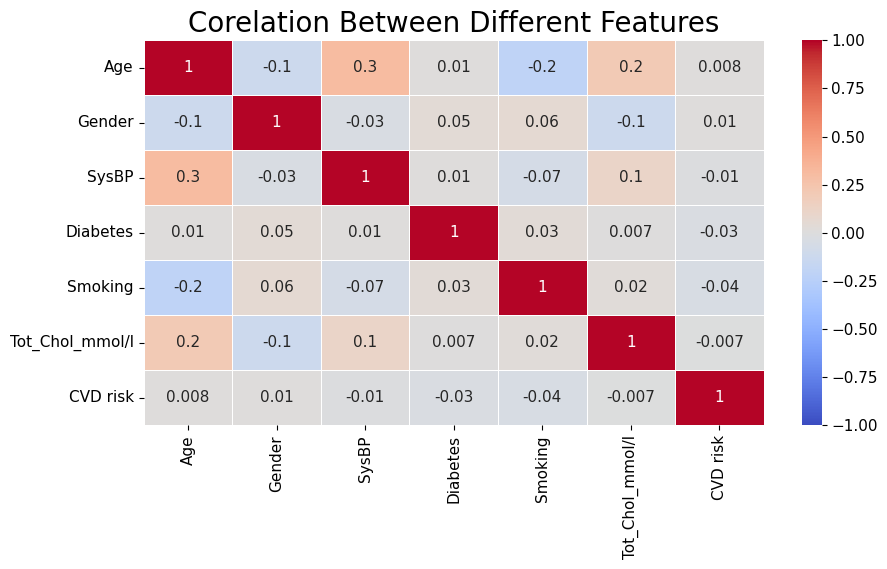

In [43]:
#plotting correlation heat map
plt.rcParams.update({'font.size': 11})
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(Brunei_df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', ax=ax, fmt='.1g', linewidths=.5);
plt.title('Corelation Between Different Features', fontsize = 20)
plt.show();

#### Observations
* `No features` has a good correlation with target CVD risk.
* `Age` and `Systolic Blood pressure` are positively correlated with each other.
* `Age` and `Total cholesterol` are positively correlated with each other.
* `Age` and `Smoking` are negatively correlated with each other.

#### *External validation of the predictive machine learning modelling will be applied in the next notebook*